In [1]:
import pandas as pd
data = pd.read_csv('../data/dragons.csv')
data = data.drop(['Unnamed: 0'],axis=1)

In [2]:
data.head(5)

,testScore,bodyLength,mountainRange,site,bodyLength2
0,16.147309,165.548520,Bavarian,a,-2.206233
1,33.886183,167.559314,Bavarian,a,-2.082204
2,6.038333,165.882952,Bavarian,a,-2.185605
3,18.838821,167.685525,Bavarian,a,-2.074419
4,33.862328,169.959681,Bavarian,a,-1.934145


In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

<AxesSubplot:xlabel='testScore', ylabel='Count'>

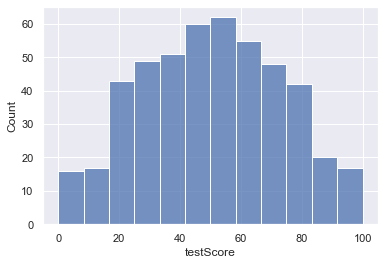

In [8]:
sns.histplot(data.testScore)

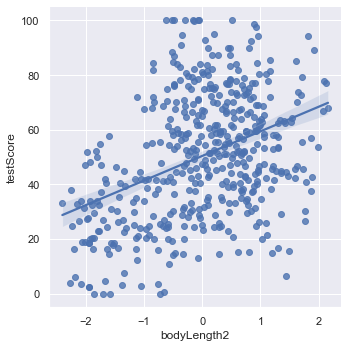

In [9]:
sns.lmplot(x='bodyLength2', y='testScore', data=data)

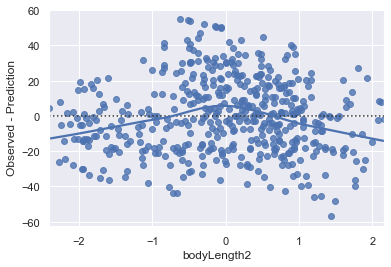

In [10]:
ax = sns.residplot(x='bodyLength2', y='testScore', data = data, lowess = True)
ax.set(ylabel='Observed - Prediction')
plt.show()

<AxesSubplot:xlabel='mountainRange', ylabel='testScore'>

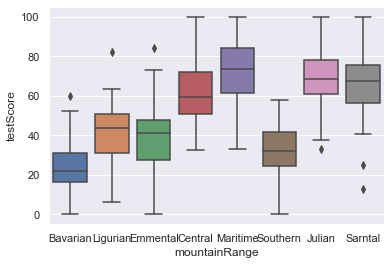

In [11]:
sns.boxplot(x='mountainRange', y='testScore', data=data)

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
md = smf.mixedlm("testScore ~ bodyLength2", data, groups=data["mountainRange"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: testScore 
No. Observations: 480     Method:             REML      
No. Groups:       8       Scale:              223.8143  
Min. group size:  60      Log-Likelihood:     -1992.8155
Max. group size:  60      Converged:          Yes       
Mean group size:  60.0                                  
--------------------------------------------------------
               Coef.  Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      50.386    6.552 7.691 0.000 37.545 63.227
bodyLength2     0.538    1.287 0.418 0.676 -1.985  3.060
Group Var     339.666   12.477                          



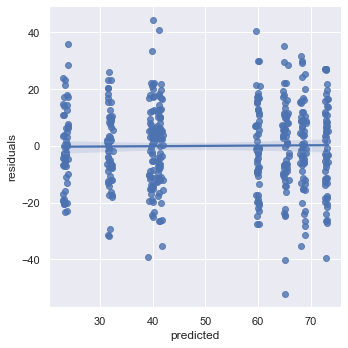

In [14]:
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["bodyLength2"] = data.bodyLength2
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

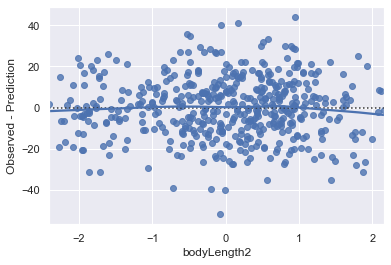

In [15]:
ax = sns.residplot(x = "bodyLength2", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()